<a href="https://colab.research.google.com/github/jgait/DSPS_WGaither/blob/main/HW3/HW3_KS_earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by FedericaBBianco @fedhere for DSPS/MLNPS
# Kolmogorov Smirnoff test, application to earthquake data

In [ ]:
#all the imports I needed
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats

%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


This homework asks you to reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible".
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law.

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.

Remind yourself exactly what the K-S test is about :

    1 What is the test's Null Hypothsis that the K-S test tests?
    
    





1) The K-S tests if there is significant evidence to reject the Null Hypothesis, which implies that the data does not follow the specified distribtuion. In this case the Null Hypothesis would be that earthquakes follow a consistent scaling law.




    2 What is the "statistic" or "pivotal quantity" that the test uses?
    


2) It uses the scaling behavior of seismic activity to look for power-law or fractal behavior.




    3 What does the probability distribution of this statistic depend on?
    
   


3) The Data Quality and the Sample size of the data for the seismic activity.


    

# Data Retrival

The first reason why the paper is not techincally _reproducible_ is that, while a link is provided to retrieve the data, the link is dead. This happens often. Services like [Zenodo](https://zenodo.org/) or journals that serve data provide some insurance against this but unfortunately the standards are not strict.

You can retrieve the data yourself from [this website](http://service.scedc.caltech.edu/eq-catalogs/poly.php). Think about what setting up data like this means for reproducibility. Did the author comply to reproducibility standards?__ Make sure the number of entries in your final dataset is similar to that of the authors. I got 70798, instead of 77000. 10% off, which I deem close enough. You should get something similar. Use the map in the paper to determine the region of interest. Call the file earthquakes_\<firstinitialLastname\>.csv and upload it to your github repository. Read it your file, instead of mine as instructed below. If you are getting weird results compare to what I got, go back and check how the files differ.

# Data Ingestion

## read in data

I saved the data in a file called "earthquakes.csv", where ```csv``` stands for "comma separated file". [This file format](https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/) requires different entries in a row to be separated by commas alone (no space) and for commas to be used in quote if they are not intended to separate entries.

```
a,b,c
d,e,f
g,"h,2",i
```
The data is uploaded on the  github homework repository but to read it in you will need to get the link to the *raw file*: the link to the file earthquakes.csv which is in my GitHub repository https://github.com/fedhere/MLPNS2021/tree/main/HW2_NHRT takes you to an ```html``` page that includes the content of the file, but you want to isolate the content of the file itself: the _raw file_. Pay attention to this: from the next time I will not give you the exact link, I will just point you to the file and you will have to find the link to the raw data from there. (remember to use the "raw" link)

The data can be read effectively using the _pandas_ python package as ```pandas.read_csv(<file name or URL>)```.

However, I did not format the data correctly, according to the csv extension requirement. This happens all the time. Look at the file and use the pandas documentation to figure out how to read it with ```pd.read_csv()```

In [ ]:
#your code here...

# File is horribly made, have to do some goofy manupulation

# Get out the Date, Time, and Magnitude
cols = ['#YYY/MM/DD',
        'HH:mm:SS.ss',
        'Unnamed: 5']

# instead of doing it this weird way, you can use skipinitialspaces = True

# Loading in the earthquake CSV into pandas dataframe:
eqdata = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/data/earthquakes.csv',
                     sep=' ',
                     usecols=cols)

running the following lines of code should give you the same result as mine if you used the file I provided (467 students), and qualitatively  similar if you are using your own data (667 students)

In [ ]:
eqdata.shape

(70798, 3)

In [ ]:
eqdata.head()

,#YYY/MM/DD,HH:mm:SS.ss,Unnamed: 5
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13


In [ ]:
eqdata.describe()

,Unnamed: 5
count,70798.000000
mean,2.417826
std,0.407683
min,2.000000
25%,2.120000
50%,2.300000
75%,2.590000
max,7.100000


now that you have a dataframe object you can use methods of the object to modify it. Use the method ```eqdata.rename``` to change the names of the 3 columns that are the only three relevant to us: _date, time, magnitude_

## prepare date-time column

In [ ]:
# your code here...

# Rename the columns to things that make sense
renamed = {'#YYY/MM/DD':'date',
           'HH:mm:SS.ss':'time',
           'Unnamed: 5':'magnitude'}

eqdata.rename(columns=renamed, inplace=True)


In [ ]:
eqdata.head()

,date,time,magnitude
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13


In [ ]:
eqdata.describe()

,magnitude
count,70798.000000
mean,2.417826
std,0.407683
min,2.000000
25%,2.120000
50%,2.300000
75%,2.590000
max,7.100000


Now you want to combine the columns containing date and time and convert them to a "datetime" kind of data object.


What data type are the _time_ and _date_ columns right now? What type you want them to be to conver them to datetime with ```pd.datetime()```? type 'O' means object, typically a string.

In [ ]:
eqdata.time.dtype, eqdata.date.dtype

(dtype('O'), dtype('O'))

to do this conversion I

   1. joined date and time into a single string for each row with a ["list comprehension"](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) (essentially a for loop but more efficient and compact). You do not have to do it with a list comprehension, you can use just a for loop.

   2. used pd.datetime() to convert the resulting new dataframe column into a dataframe column containing _datetime_ objects (see lab)

   3. but this did not work because of the formatting of some dates, so I had to go back and fix 5 entries. (you are on your own to figure out this one)

In [ ]:
# your code here

"""
Explaining the problem in the 5 data entires:

1984/08/09 04:48:60.00
1990/12/25 14:19:60.00
1992/07/10 21:48:60.00
1995/07/08 15:34:60.00
1999/08/14 06:41:60.00

The problem with all of these entries are that its at exactly 60 seconds,
this causes the pandas datetime to fail. To fix this, we'll add one to
the minutes and set the seconds to zero.

Stupid data collection!
"""


# Function for the map generator to use
def combine_date_time(date, time):
  # Combine the dates and times with a space between them using f-strings
  combined = f'{date} {time}'
  # Try to create the datetime and return it
  try:
    dt = pd.to_datetime(combined)
  # If it fails, fix it as mentioned above.
  except: # Changed to accept onyl parse errors
    combined = f'{combined[:14]}{int(combined[14:16]) + 1}:00.00'
    dt = pd.to_datetime(combined)

  return dt



# Set the Data and Time as a list:
date_list = eqdata.date.values
time_list = eqdata.time.values

# Map all the dates and times into pandas datetimes.
eqdata['datetime'] = list(map(lambda d, t: combine_date_time(d, t), date_list, time_list))

# Set the datetime to the index of the dataset
eqdata.set_index('datetime', inplace=True)
# Delete the old date and time columns
eqdata.drop(columns=['date', 'time'], inplace=True)


In [ ]:

eqdata.head()

,magnitude
datetime,
1984-01-01 01:30:57.520,2.02
1984-01-01 05:31:34.160,2.12
1984-01-01 06:59:05.140,2.43
1984-01-01 11:10:25.290,2.07
1984-01-01 19:38:19.790,2.13


## select valuable data

Following the description in Section 2  of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018. You can see the cell of code I used to do this [here](https://github.com/fedhere/DSPS/blob/master/HW3/Corral2018_selectStationary.py) at no points cost, cause it was a bit tricky, but I encourage you to try and do it yourself. If you can do it in fewer lines than I did its automatically +5 points (just turning the loop into a list comprehension does not count. That is an obvious way to decrease the number of lines of code; I did not do it simply to enhance readability.)

Jensen: We need to extract the following date ranges which are the stationary periods
>  1984 − 1986.5 <br>
> 1990.3 − 1992.1 <br>
> 1994.6 − 1995.6 <br>
> 1996.1−1996.5 <br>
> 1997−1997.6 <br>
> 1997.75−1998.15 <br>
> 1998.25−1999.35 <br>
> 2000.55−2000.8 <br>
> 2000.9 − 2001.25 <br>
> 2001.6 − 2002 <br>
> 2002.5 − 2003 <br>

In [ ]:
stationary_prd =  [(1984, 1986.5),
                  (1990.3, 1992.1),
                  (1994.6, 1995.6),
                  (1996.1, 1996.5),
                  (1997, 1997.6),
                  (1997.75, 1998.15),
                  (1998.25, 1999.35),
                  (2000.55, 2000.8),
                  (2000.9, 2001.25),
                  (2001.6, 2002),
                  (2002.5, 2003)]

In [ ]:
print (f"the {len(stationary_prd)} timestamp pairs that are the boundaries of good data periods are:")
for pair in stationary_prd:
  print(f"{pair[0]} to {pair[1]}")

the 11 timestamp pairs that are the boundaries of good data periods are:
1984 to 1986.5
1990.3 to 1992.1
1994.6 to 1995.6
1996.1 to 1996.5
1997 to 1997.6
1997.75 to 1998.15
1998.25 to 1999.35
2000.55 to 2000.8
2000.9 to 2001.25
2001.6 to 2002
2002.5 to 2003


The following cell of code shows you the array of bool values (True/False) which I create to use as an index to the input array: when used as an index, a technique called "broadcasting" in python, will select only elements of the original array where the index array value is True. something like
Try:



In [ ]:
a = np.array([0, 1, 2])
a, a[[True, False, True]]

(array([0, 1, 2]), array([0, 2]))

For each of the 11 valid periods I create a condition
``` datetime >= period_start AND datetime <= period_end ``` where AND is a product of booleans: True * False = False.

I want to take all chunks of data that satisfy this condition for any of the 11 chunks of time so that is a logical OR operator, or a sum of Booleans: True + False = True

This is because ```True``` really corresponds to "not 0" and False to "0". So ```"not 0" * 0 = 0``` and ```"not 0" + 0 = not 0```
    

In [ ]:
eqGoodData = pd.DataFrame(columns = eqdata.columns)

for start_yr, end_yr in stationary_prd:
  start_date = pd.to_datetime(f"{int(start_yr)}-01-01") + pd.DateOffset(days=365.25 * (start_yr - int(start_yr))) # Clean up start date
  end_date = pd.to_datetime(f"{int(end_yr)}-01-01") + pd.DateOffset(days=365.25 * (end_yr - int(end_yr))) # Clean up end data
  eqGoodData = pd.concat([eqGoodData, eqdata[(eqdata.index >= start_date) & (eqdata.index <= end_date)]]) #Broadcast and concatenate

In [ ]:
print (f"there are {eqGoodData.shape[0]} earthquakes falling in the selected stationary periods")

there are 18854 earthquakes falling in the selected stationary periods


In [ ]:
eqGoodData.shape

(18854, 1)

In [ ]:
eqGoodData.head()

,magnitude
1984-01-01 01:30:57.520,2.02
1984-01-01 05:31:34.160,2.12
1984-01-01 06:59:05.140,2.43
1984-01-01 11:10:25.290,2.07
1984-01-01 19:38:19.790,2.13


Now what you really want is the _time interval between earthquakes_ for all events greater than some magnitude m, while all you have are the date and time of the events.:

You can remove earthquakes smaller than magnitude 2 by, again, broadcasting. How would that look like?

In [ ]:
eqGoodData = eqGoodData[eqGoodData["magnitude"] > 2]

In [ ]:
eqGoodData.shape # Not needed for our data

(18029, 1)

You can get the time between consecutive earthquakes with the method ```diff()``` of numpy arrays (in a pandas series you can get the data as a numpy array with the attribute .values: ```seried.values```).


In [ ]:
eqGoodData["Diff"] = eqGoodData.index.to_series().diff()

In [ ]:
eqGoodData.shape

(18029, 2)

In [ ]:
eqGoodData.head()

,magnitude,Diff
1984-01-01 01:30:57.520,2.02,NaT
1984-01-01 05:31:34.160,2.12,0 days 04:00:36.640000
1984-01-01 06:59:05.140,2.43,0 days 01:27:30.980000
1984-01-01 11:10:25.290,2.07,0 days 04:11:20.150000
1984-01-01 19:38:19.790,2.13,0 days 08:27:54.500000


In [ ]:
eqGoodData.describe()

,magnitude,Diff
count,18029.000000,18028
mean,2.417662,0 days 09:14:15.096087752
std,0.391676,13 days 01:38:50.853970113
min,2.010000,0 days 00:00:00.170000
25%,2.130000,0 days 00:47:30.935000
50%,2.300000,0 days 02:35:36.370000
75%,2.580000,0 days 06:13:05.592500
max,5.800000,1388 days 07:40:00.240000


Note that the first entry will be NaT which is Not a Time (corresponding to nan for numerical variables) or maybe a negative number (depends on your exact operations above). You should remove it

In [ ]:
eqGoodData = eqGoodData.dropna(subset="Diff")

In [ ]:
eqGoodData.head()

,magnitude,Diff
1984-01-01 05:31:34.160,2.12,0 days 04:00:36.640000
1984-01-01 06:59:05.140,2.43,0 days 01:27:30.980000
1984-01-01 11:10:25.290,2.07,0 days 04:11:20.150000
1984-01-01 19:38:19.790,2.13,0 days 08:27:54.500000
1984-01-01 19:39:19.670,2.13,0 days 00:00:59.880000


# data exploration
At this point you should wonder if this is the final dataset that you want to use and if anything is weird or suspicious about it. Visualize the distribution. A good way to visualize distributions is a histogram which you can prodice with pl.hist() or as a method of your dataframe series as ```df[SeriesName].plot(kind="hist")```. Produce a plot like the one below (label the axis! and describe it with a caption!). To get the logarithmic y axis you can se ```logy=True```, for example. in your ```df[SeriesName].plot``` call.

Text(0.5, 0, 'Inter Event Duration (Days)')

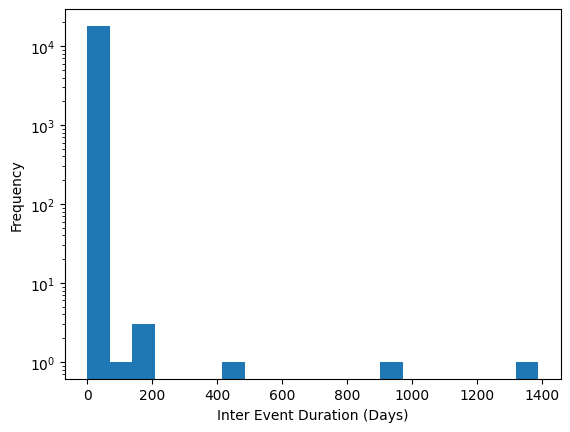

In [ ]:

seconds_in_day = 3600 * 24
ax = (eqGoodData["Diff"].dt.total_seconds()/seconds_in_day).plot(kind="hist", bins = 20, logy=True)
ax.set_xlabel("Inter Event Duration (Days)")

**Figure 1:** Histogram of inter event durations in days. It is clear that most events are clustured around the low end of the duration scale with singular outliers higher up the scale

In [ ]:
(eqGoodData["Diff"].dt.total_seconds()/seconds_in_day).describe()

count    18028.000000
mean         0.384897
std         13.068644
min          0.000002
25%          0.032997
50%          0.108060
75%          0.259093
max       1388.319447
Name: Diff, dtype: float64

The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

In [ ]:
eqGoodData = eqGoodData[eqGoodData["Diff"] < pd.to_timedelta('31 days')]

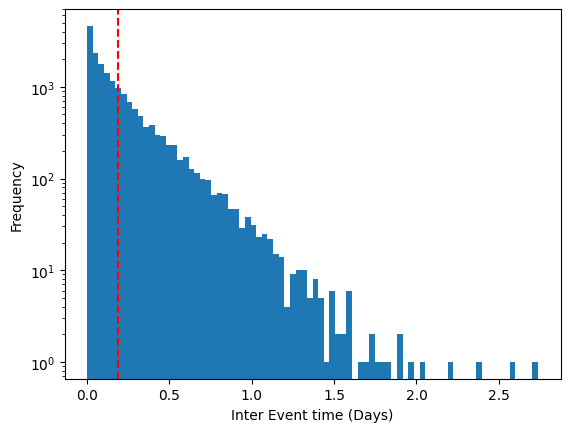

In [ ]:
ax = (eqGoodData["Diff"].dt.total_seconds()/seconds_in_day).plot(kind="hist", bins = 80, logy=True)
ax.set_xlabel("Inter Event time (Days)")
ax.axvline(x=(eqGoodData["Diff"].dt.total_seconds()/seconds_in_day).mean(), color='red', linestyle='dashed')

**Figure 2:** Inter Event Durations with the outliers removed, this permits much more granular breakdown of the data, revealing that the durations are clustered near zero with a mean well below half a day.

# data analysis

### important: the paper does not do it but I want you to formally choose a threshold before you do this test. Choose a p-value (=$\alpha$ thresold: call your variable ```alpha```) of 3-$\sigma$.

In [ ]:
import scipy
eqGoodData["DiffSec"] = eqGoodData["Diff"].dt.total_seconds()

sigma = eqGoodData["DiffSec"].std()
mean = eqGoodData["DiffSec"].mean()

print("For 3 sigma confidence")

z_score = (3*sigma - mean) / sigma # Calculate the z score
print("Z-Score:", z_score)

p_value = scipy.stats.norm.sf(z_score) # Obtain the p-value
print("P-Value:", p_value)

For 3 sigma confidence
Z-Score: 2.1679717209456477
P-Value: 0.015080419108774636


Follow the instructions (algorithm) in **Section 3 paragraph 3** and compare your results with the results in table 1 with a threshold  of = 0.01 and 0.001

Do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1).

Note that the x axis in plot Fig 1 is in _log space_. Use ```np.log10()``` to take the logarithm of the time gaps.

The pseudocode for the algorithm is [here](https://github.com/fedhere/DSPS/blob/master/HW3/Corral2018_pseudocode.md).


Reproduce the paper Fig 1 and Table 1. In the Table report the size of each dataset after cleaning the value of the statistic and the p-value, as done in Corral 2018. Use the scipy function for the 2 sample KS test. (resources [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0) to learn about the table syntax in markdown)

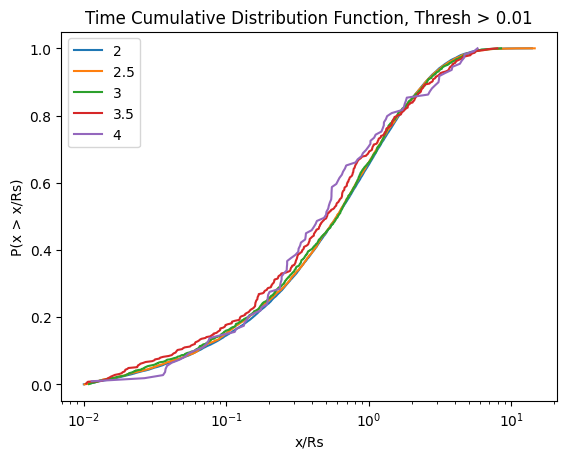

In [ ]:
# your code here

# FROM WHAT I UNDERSTAND FROM THE PAPER:
#   1. Filter the data using the 5 different 'threshholds' (2, 2.5, 3, 3.5, 4)
#   2. Rescale the data using the harmonic mean (??) I googled this and it looks
#     like you divide by the mean??
#   3. Filter all this data with the 2 threshholds (0.01, 0.001)
#   4. Plot the scatterplots from minimum to maximum.
#   5. Profit.


# STEP 1: Filter the data:

def filter_mag(eq_data, filter_mag):
  return eq_data[eq_data['magnitude'] >= filter_mag]

mags = [2, 2.5, 3, 3.5, 4]
F_mags = []

for mag in mags:
  F_mags.append(filter_mag(eqGoodData, mag))

# STEP 2: Harmonic Mean Magic that I don't really fully understand but will copy
#             from google blindly!

def voodoo_magic(F_gap, thresh):
  mean = F_gap.mean()
  F_gap = F_gap / mean
  F_gap = F_gap[F_gap > thresh]

  # Do this twice alledgedly perchance
  mean = F_gap.mean()
  F_gap = F_gap / mean
  F_gap = F_gap[F_gap > thresh]

  # Return the rescaled Gaps
  return F_gap

# STEP 3: Filter all this data for both thresholds

# 0.01
thresh1_rescale = []

for F_mag in F_mags:
  # Convert to nanoseconds
  thresh1_rescale.append(voodoo_magic(F_mag['DiffSec'] * 1e9, 0.01))

# 0.001 - yea yea i coulda just made this in one loop whatever
thresh2_rescale = []

for F_mag in F_mags:
  # Convert to nanoseconds
  thresh2_rescale.append(voodoo_magic(F_mag['DiffSec']*1e9, 0.001))


# STEP 4: (I'm getting sleepy)

figure()

for dist in thresh1_rescale:
  # Idk a better way to do this but there probably is one
  y_axis = np.arange(1, len(dist)+1)/len(dist)
  x = np.sort(dist)
  plt.plot(x, y_axis)
  plt.xscale('log')

plt.legend(mags)
plt.xlabel('x/Rs')
plt.ylabel('P(x > x/Rs)')
plt.title('Time Cumulative Distribution Function, Thresh > 0.01')

plt.show()


**Figure 3:** Time CDF for a threshold of greater than 0.01. Looks very similar to the one in the Corral paper.

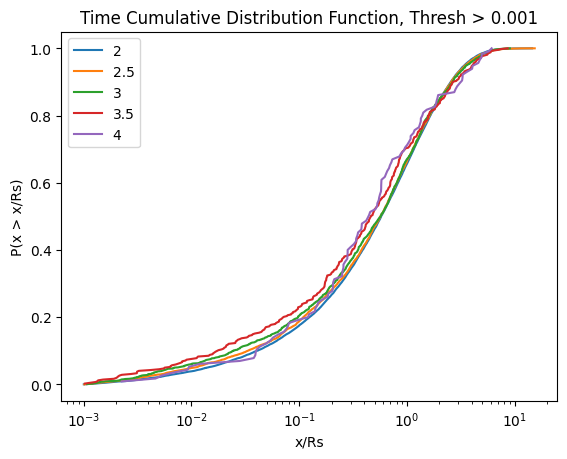

In [ ]:
# STEP 4 Pt. 2:

figure()

for dist in thresh2_rescale:
  # Idk a better way to do this but there probably is one
  y_axis = np.arange(1, len(dist)+1)/len(dist)
  x = np.sort(dist)
  plt.plot(x, y_axis)
  plt.xscale('log')

plt.legend(mags)
plt.xlabel('x/Rs')
plt.ylabel('P(x > x/Rs)')
plt.title('Time Cumulative Distribution Function, Thresh > 0.001')

plt.show()

**Figure 4:** Time CDF for a threshold of greater than 0.01. This one looks a lot less spread out than the Corral paper and the previous plot we did.

In [ ]:
# Now table time, :(

# From what I can tell we run the ks_2samp function for every combo of each
#   rescaled distributions. So lets do that, shall we.

# 0.01 Situation...

for dist in thresh1_rescale:
  print('')
  print(f'{len(dist)}')
  for dist1 in thresh1_rescale:
    d, p = sp.stats.ks_2samp(dist, dist1)
    print(f'd: {d:0.3}, p: {p:0.3}%')



17200
d: 0.0, p: 1.0%
d: 0.0118, p: 0.607%
d: 0.0201, p: 0.683%
d: 0.0657, p: 0.0705%
d: 0.11, p: 0.134%

5396
d: 0.0118, p: 0.607%
d: 0.0, p: 1.0%
d: 0.0192, p: 0.809%
d: 0.0584, p: 0.159%
d: 0.108, p: 0.15%

1358
d: 0.0201, p: 0.683%
d: 0.0192, p: 0.809%
d: 0.0, p: 1.0%
d: 0.0605, p: 0.207%
d: 0.112, p: 0.145%

391
d: 0.0657, p: 0.0705%
d: 0.0584, p: 0.159%
d: 0.0605, p: 0.207%
d: 0.0, p: 1.0%
d: 0.068, p: 0.795%

109
d: 0.11, p: 0.134%
d: 0.108, p: 0.15%
d: 0.112, p: 0.145%
d: 0.068, p: 0.795%
d: 0.0, p: 1.0%


**Table 1:** This is the table of the ks results for a threshold of 0.01, in the same format as the Corral paper.

| m=0.01 | N     | M≥2.0  | M≥2.5  | M≥3.0  | M≥3.5   | M≥4.0  |
|--------|-------|--------|--------|--------|---------|--------|
| M≥2.0  | 17200 | -      | 0.607 | 0.683 | 0.0705 | 0.134 |
| M≥2.5  | 5396  | 0.0118 | -      | 0.809 | 0.159  | 0.150 |
| M≥3.0  | 1358  | 0.0201 | 0.0192 | -      | 0.207  | 0.145 |
| M≥3.5  | 391   | 0.0657 | 0.058  | 0.060  | -       | 0.795|
| M≥4.0  | 109   | 0.110  | 0.108  | 0.112  | 0.068   | -      |

In [ ]:
# 0.001 Situation...

for dist in thresh2_rescale:
  print('')
  print(f'{len(dist)}')
  for dist1 in thresh2_rescale:
    d, p = sp.stats.ks_2samp(dist, dist1)
    print(f'd: {d:0.3}, p: {p:0.3}%')


17908
d: 0.0, p: 1.0%
d: 0.0181, p: 0.116%
d: 0.0319, p: 0.128%
d: 0.0715, p: 0.0278%
d: 0.107, p: 0.137%

5678
d: 0.0181, p: 0.116%
d: 0.0, p: 1.0%
d: 0.0226, p: 0.587%
d: 0.0581, p: 0.135%
d: 0.104, p: 0.166%

1448
d: 0.0319, p: 0.128%
d: 0.0226, p: 0.587%
d: 0.0, p: 1.0%
d: 0.0551, p: 0.262%
d: 0.102, p: 0.198%

423
d: 0.0715, p: 0.0278%
d: 0.0581, p: 0.135%
d: 0.0551, p: 0.262%
d: 0.0, p: 1.0%
d: 0.0794, p: 0.586%

115
d: 0.107, p: 0.137%
d: 0.104, p: 0.166%
d: 0.102, p: 0.198%
d: 0.0794, p: 0.586%
d: 0.0, p: 1.0%


**Table 2:** This is the table of the ks results for a threshold of 0.01, in the same format as the Corral paper.

| m=0.001 | N     | M≥2.0  | M≥2.5  | M≥3.0  | M≥3.5  | M≥4.0  |
|---------|-------|--------|--------|--------|--------|--------|
| M≥2.0   | 17200 | -      | 0.116 | 0.128| 0.028 | 0.137 |
| M≥2.5   | 5396  | 0.0181 | -      | 0.587 | 0.135 | 0.166 |
| M≥3.0   | 1358  | 0.0319 | 0.0226 | -      | 0.262 | 0.198 |
| M≥3.5   | 391   | 0.0715 | 0.0581 | 0.0551 | -      | 0.586 |
| M≥4.0   | 109   | 0.107  | 0.104  | 0.102  | 0.0794 | -      |

Did you find any statistical significant differences between the distributions? What does it mean? Is your result identical to Correll's 2018? Why or why not? **Discuss!**




**Answer:** Yes! There is a huge different between the percentages from the ks test results, I'm guessing this is because some of the extra filtering we did, but its also entirely possible that we just messed up somewhere.

### "extra credits"

**How could you _force_ a significant result?**
Organize your result for different magnitude threshold in a numpy array (it should be a 5x5 array) for both cutoffs (0.01 and 0.001). Each of these arrays should contain the p-value for the pair of distributions i,j in cell \[i\]\[j\] and \[j\]\[i\]. Use ```imshow``` to visualize this 2D data. FIrst visualize the matrix itself as done below.

In [ ]:
# your code here

pl.imshow((ks_001));
pl.axis('off')
cb = pl.colorbar()
cb.ax.set_ylabel(r'$p$-value')
pl.title("KS test results");
#add a caption


Now visualize the result as a matrix where the cells are white if the results is not statistically significant and red otherwise.
After doing it fot the set alpha threshold, lower your alpha threshold so that at least one pair of distribution has a statistically significant difference. **Warning!! this is an _unethical and horrifying practice_! Once you chose your significance threshold you are never allowed to change it! Why? Discuss**

Redoing it for threshold 0001